### Work Flow:
Data ---> Data Preprocessing ---> Feature Engineering ---> Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [2]:
# loading the data
titanic = pd.read_csv('train.csv')

# checking the size of the dataframe
print(f"Shape of dataframe: {titanic.shape}")

# print the first five rows of the dataframe
titanic.head()

Shape of dataframe: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preprocessing

###### perform some basic data preprocessing

In [4]:
# finding some information on the dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# drop unnecessary columns
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
# fill missing age values with the median value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [8]:
# fill missing embarked values with mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

### Feature Engineering

###### perform feature engineering

In [9]:
# Add a new feature for family size
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [10]:
# Add a new feature for alone/not alone
titanic['IsAlone'] = 0

In [11]:
# Set IsAlone to 1 if family size is 1
titanic.loc[titanic['IsAlone'] == 1, 'IsAlone'] = 1

### Data Analysis and Visualization

In [12]:
# Get summary statistics of the numerical columns
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.904602,0.0
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459,0.0
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.0
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.0
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.0
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.0
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,0.0


In [13]:
# Get the information for the various genders onboard 
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
# Get the information for the various passenger classes 
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
# Get the information for the various embarkation ports 
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# Get the information for the survival rate
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### perform general visualizations

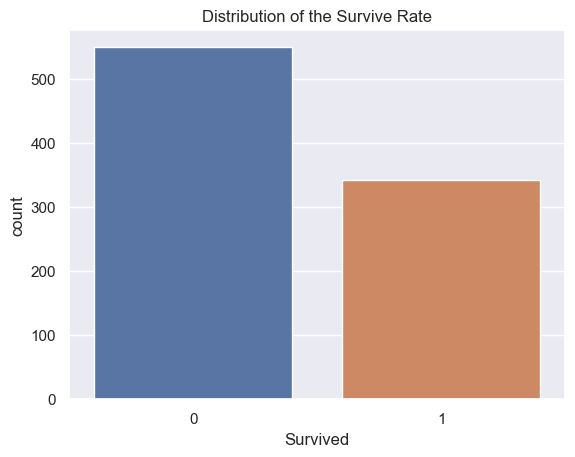

In [31]:
sns.set()

# visualize the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic)
plt.title("Distribution of the Survive Rate")
plt.show()

###### visualize the distribution of the numerical variables

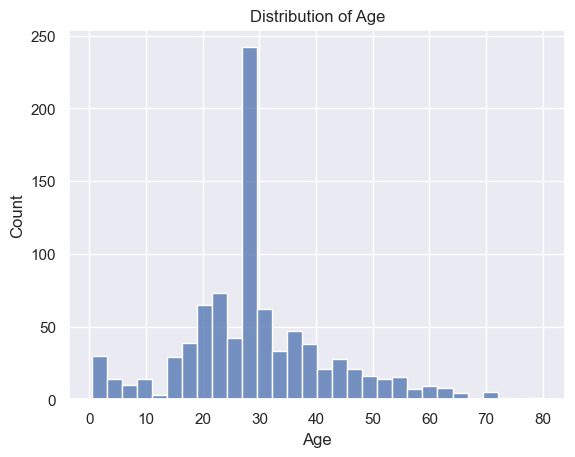

In [32]:
# visualize the distribution of the Age
sns.histplot(x='Age', data=titanic)
plt.title('Distribution of Age')
plt.show()

In [33]:
# finding the average age of people onboard
titanic["Age"].mean()

29.36158249158249

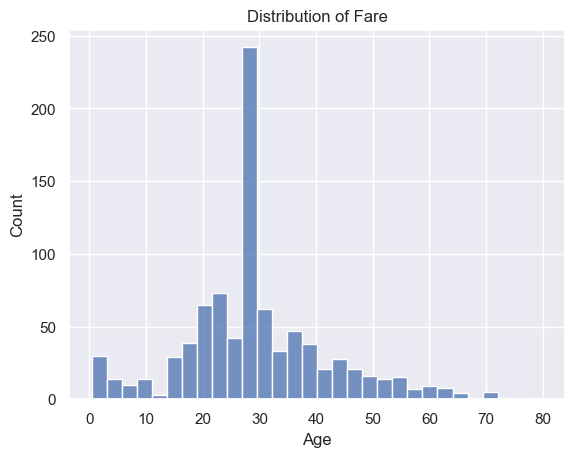

In [34]:
# visualize the distribution of the Fare
sns.histplot(x='Age', data=titanic)
plt.title('Distribution of Fare')
plt.show()

##### visualize the distribution of the categorical variables

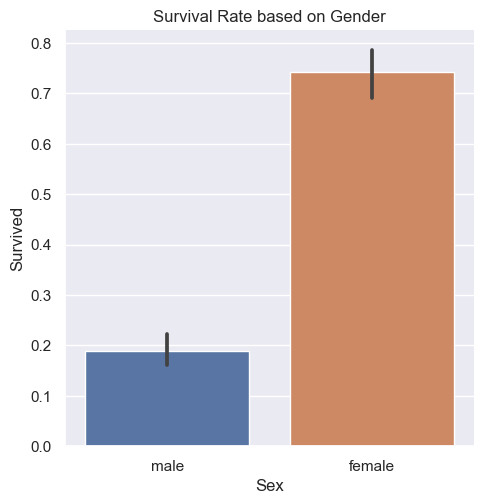

In [35]:
# visualize the relationship between the target variable and gender column
sns.catplot(x='Sex', y='Survived', data=titanic, kind='bar')
plt.title('Survival Rate based on Gender')
plt.show()

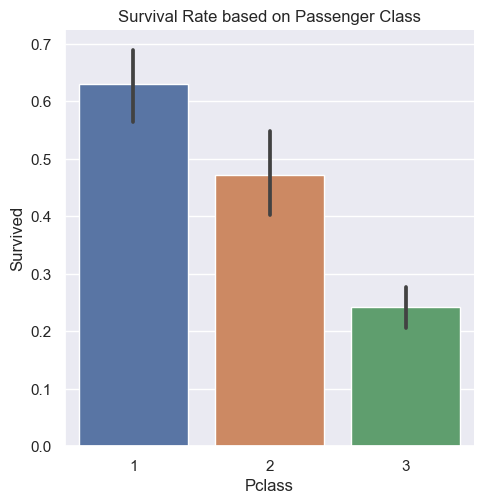

In [36]:
# visualize the relationship between the target variable and passenger class column
sns.catplot(x='Pclass', y='Survived', data=titanic, kind='bar')
plt.title('Survival Rate based on Passenger Class')
plt.show()

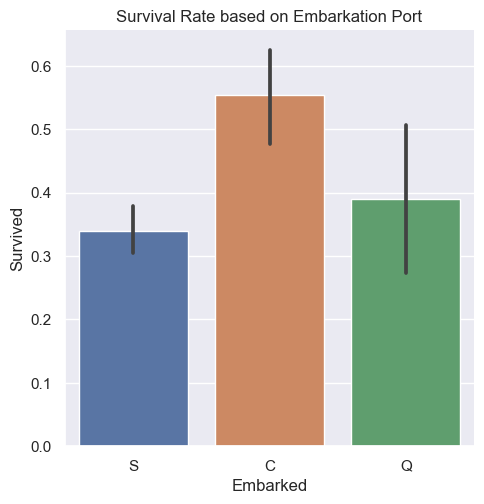

In [37]:
# visualize the relationship between the target variable and embarked column
sns.catplot(x='Embarked', y='Survived', data=titanic, kind='bar')
plt.title('Survival Rate based on Embarkation Port')
plt.show()

###### perform visualizations of survival based on features

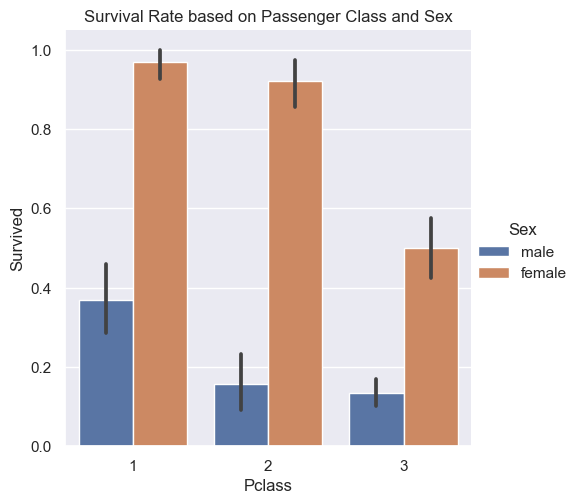

In [38]:
# visualize the survival rate based on passenger class and sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic, kind='bar')
plt.title('Survival Rate based on Passenger Class and Sex')
plt.show()

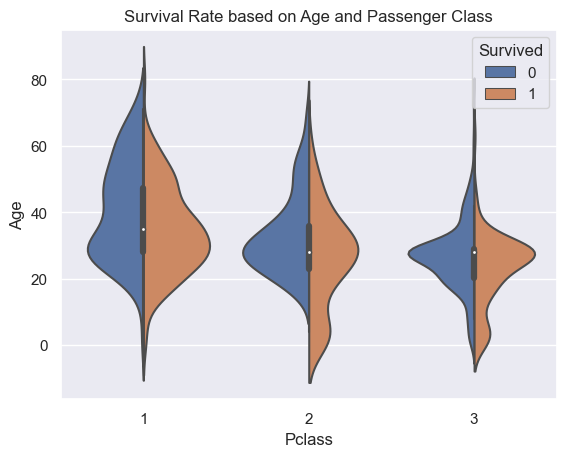

In [39]:
# visualize the survival rate based on age and passenger class
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic, split=True)
plt.title('Survival Rate based on Age and Passenger Class')
plt.show()

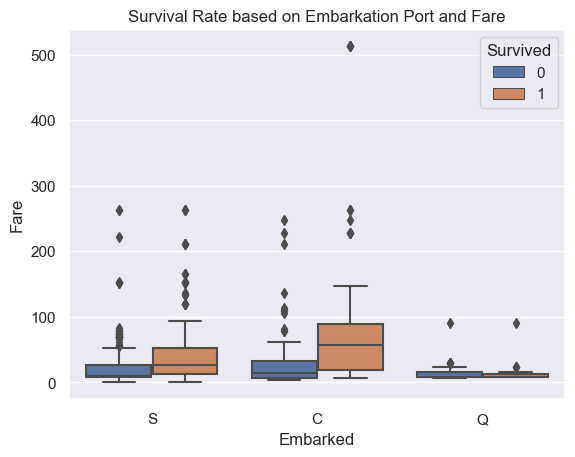

In [40]:
# visualize the survival rate based on embarkation port and fare
sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=titanic)
plt.title('Survival Rate based on Embarkation Port and Fare')
plt.show()

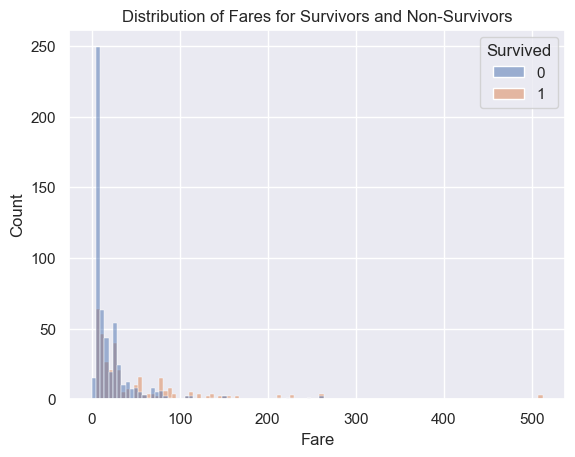

In [41]:
# visualize the distribution of fares for survivors and non-survivors
sns.histplot(x='Fare', hue='Survived', data=titanic)
plt.title('Distribution of Fares for Survivors and Non-Survivors')
plt.show()

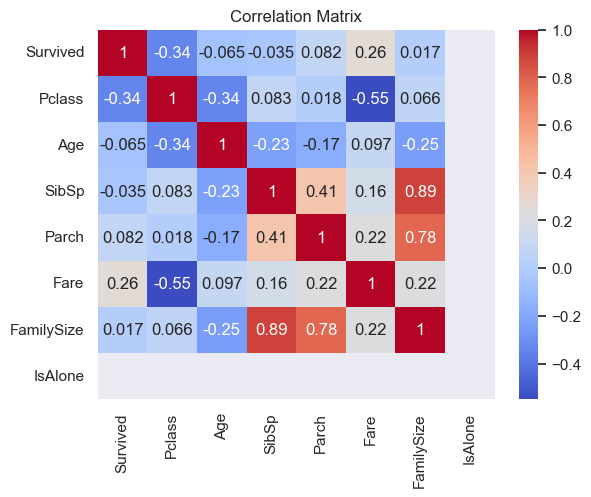

In [42]:
# visualize the correlation between features
correlation_matrix = titanic.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()